In [1]:
# Import libraries. You may or may not use all of these.
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn 
import seaborn as sns
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

In [2]:
# Import data
dataset = pd.read_csv('insurance.csv')
dataset.tail()

,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [3]:
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.00,27.0000,39.00,51.000,64.00
bmi,1338.0,30.665471,6.098382,16.00,26.3000,30.40,34.700,53.10
children,1338.0,1.094918,1.205493,0.00,0.0000,1.00,2.000,5.00
expenses,1338.0,13270.422414,12110.011240,1121.87,4740.2875,9382.03,16639.915,63770.43


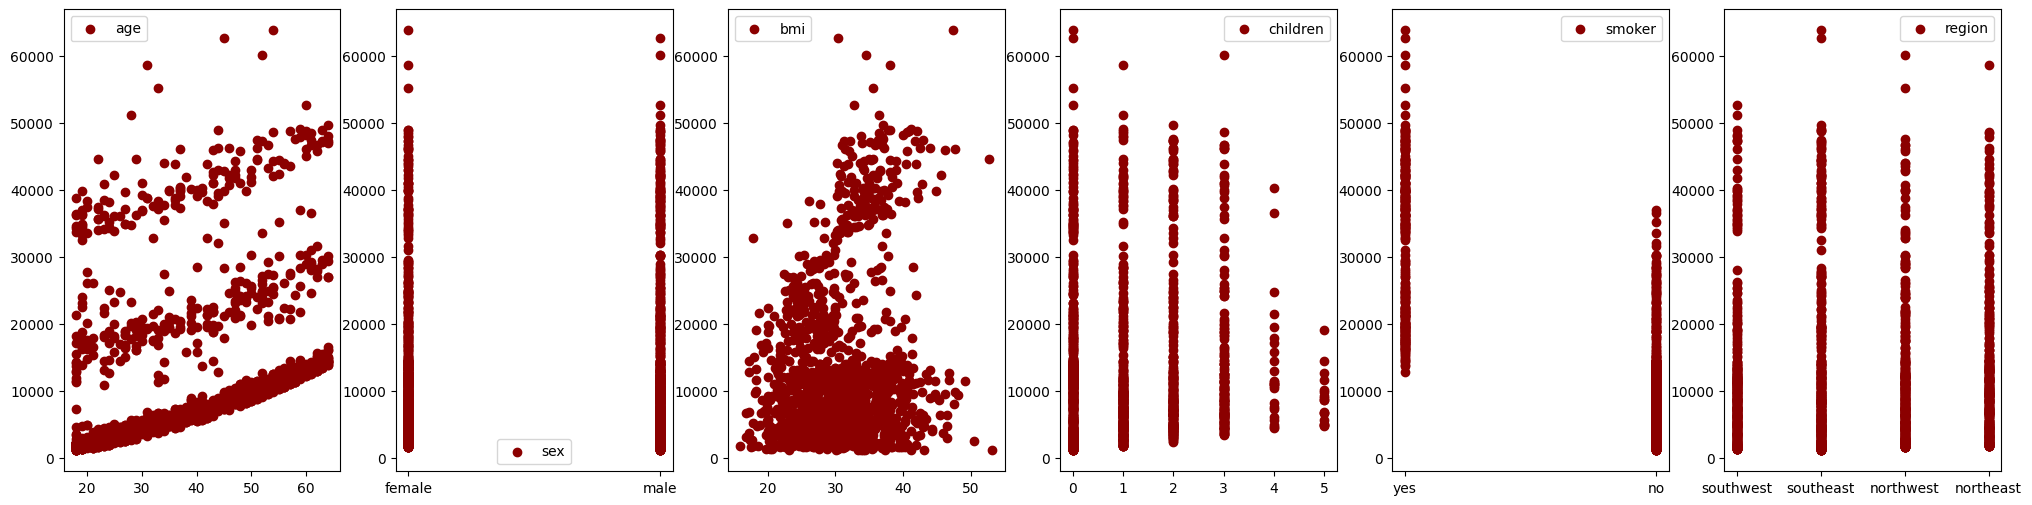

In [4]:
n = len(dataset.columns)
fig, axs = plt.subplots(1, n-1, figsize=(25,6))
i=0
for col in dataset.columns:
    if col != 'expenses':
        axs[i].scatter(dataset[col], dataset['expenses'], color='darkred', label=col)
        axs[i].legend()
        i+=1
plt.show()

In [5]:
print(dataset['children'].value_counts())

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64


In [6]:
numerical_features = ['age', 'bmi', ]
categorical_features = ['sex', 'smoker', 'region', 'children']
drop_features = []
features = numerical_features + categorical_features

In [7]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PowerTransformer, Normalizer
dataset_copy = dataset.copy(deep=True)
dataset_copy.drop(drop_features, axis=1, inplace=True)
pt = PowerTransformer(method='yeo-johnson')
dataset_copy[numerical_features] = pt.fit_transform(dataset[numerical_features])

In [8]:
dataset_copy = pd.get_dummies(dataset, columns=categorical_features, dtype=int)
# from sklearn.preprocessing import LabelEncoder
# for col in categorical_features:
#     le = LabelEncoder()
#     dataset_copy[col] = le.fit_transform(dataset_copy[col])

In [9]:
train_dataset = dataset_copy.sample(frac=0.8, random_state=0)
test_dataset = dataset_copy.drop(train_dataset.index)

train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,1070.0,39.036449,14.142122,18.00,26.000,39.000,51.0000,64.0
bmi,1070.0,30.737290,6.065193,16.00,26.300,30.500,34.8000,53.1
expenses,1070.0,13056.551654,11994.260172,1121.87,4565.995,9289.085,15826.1125,60021.4
sex_female,1070.0,0.501869,0.500230,0.00,0.000,1.000,1.0000,1.0
sex_male,1070.0,0.498131,0.500230,0.00,0.000,0.000,1.0000,1.0
smoker_no,1070.0,0.800935,0.399484,0.00,1.000,1.000,1.0000,1.0
smoker_yes,1070.0,0.199065,0.399484,0.00,0.000,0.000,0.0000,1.0
region_northeast,1070.0,0.248598,0.432402,0.00,0.000,0.000,0.0000,1.0
region_northwest,1070.0,0.235514,0.424518,0.00,0.000,0.000,0.0000,1.0
region_southeast,1070.0,0.281308,0.449848,0.00,0.000,0.000,1.0000,1.0


In [10]:
train_labels = train_dataset.pop('expenses')
test_labels = test_dataset.pop('expenses')

In [11]:
# sns.pairplot(train_dataset[numerical_features+categorical_features], diag_kind="kde")

In [12]:
# normalizer = keras.layers.Normalization()
# normalizer.adapt(np.array(train_dataset))

In [18]:
model = keras.models.Sequential([
    # normalizer,
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(units=1)
])

In [19]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [20]:
loss = keras.losses.MeanAbsoluteError()
optim = keras.optimizers.Adam(learning_rate=0.001)
metrics=['mae', 'mse']
model.compile(optimizer=optim, loss=loss, metrics=metrics)

In [21]:
# batch_size = 5
history = model.fit(
    train_dataset, train_labels,
    # batch_size=batch_size,
    epochs=100,
    verbose=1,
    validation_split=0.2
    )

Epoch 1/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 12774.1377 - mae: 12774.1377 - mse: 310542240.0000 - val_loss: 14365.0254 - val_mae: 14365.0254 - val_mse: 361421120.0000
Epoch 2/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 12173.2314 - mae: 12173.2314 - mse: 290078816.0000 - val_loss: 14094.9043 - val_mae: 14094.9043 - val_mse: 353398368.0000
Epoch 3/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 12111.3662 - mae: 12111.3662 - mse: 283044576.0000 - val_loss: 13093.1406 - val_mae: 13093.1406 - val_mse: 324970784.0000
Epoch 4/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 11695.4395 - mae: 11695.4395 - mse: 285824768.0000 - val_loss: 10543.5156 - val_mae: 10543.5156 - val_mse: 258256176.0000
Epoch 5/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8899.9727 - mae: 8899.9727 - mse: 208200096.0000 - val_loss: 8041.9146 - val_mae: 8041.9146 - val_mse: 184478016.0000
Epoch 6/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6799.9941 - mae: 6799.9941 - mse: 13515

9/9 - 0s - 6ms/step - loss: 3486.0725 - mae: 3486.0725 - mse: 50325160.0000
Testing set Mean Abs Error: 3486.07 expenses
You passed the challenge. Great job!
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


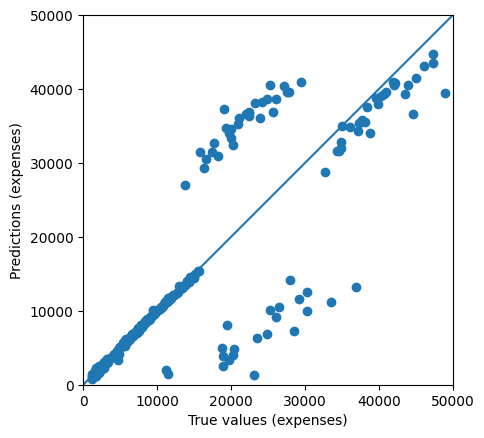

In [23]:
# RUN THIS CELL TO TEST YOUR MODEL. DO NOT MODIFY CONTENTS.
# Test model by checking how well the model generalizes using the test set.
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = model.predict(test_dataset).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)
